Please fill in your name and that of your teammate.

You: Hans Andrea Danuser

Teammate: Andrea Tettamanti

# Introduction

Welcome to the eleventh lab. Deep Learning takes the already complex topic of Neural Networks and turns it up a notch. Several notches, in fact. It's hard to find an exercise that would fit in a single assignment, let alone a set of exercises for all of these topics.

In pursue of the goal of this course (to arm you for further study), this lab gets you to practice a few bases, while providing several pointers to delve deeper. The required questions may be lighter than you expect by now: this should leave you time to explore the bonus questions and extra material. All of the mentioned links are worthy pursuing, so if any catches your attention you should go ahead and check it out, we got you covered.

### How to pass the lab?

Below you find the exercise questions. Each question awarding points is numbered and states the number of points like this: **[0pt]**. To answer a question, fill the cell below with your answer (markdown for text, code for implementation). Incorrect or incomplete answers are in principle worth 0 points: to assign partial reward is only up to teacher discretion. Over-complete answers do not award extra points (though they are appreciated and will be kept under consideration). Save your work frequently! (`ctrl+s`)

**You need at least 12 points (out of 18 available) to pass** (66%).

# 1. History and implementations

#### 1.1 **[1pt]** Mention 3 reasons why DL did not happen 30 years ago.

The first reason is that the researcher working in the field in the beginning of the second part of the twentieth century overestimated the power of basic tecniques such as the Perceptron. This led goverments to invest large amount of money in research projects whose objective was to solve problem which were unrealistically hard to solve using basic architectures. A lack of founding and advancement in the field of articificial intelligence followed the failure of those projects.

Another reason is the tecnical difficulties associeted with DL. The computing power and the memory of computers in the nineties simply weren't sufficient to train a DL model.


A further cause for the late development of DL was the lack of data.
In 2016 it has been measure that 90% of the total data available at the time was created in the previous two years. Deep Learning models are used to solve complex problem and the amount of data use to train a model should be proportional to the problem complexity. Thirty years ago there wasn't enough data to train a DL model.

#### 1.2 **[1pt]** Explain the main pros/cons of GPU vs. CPU

GPUs are designed for performing parallel computation, having thousands of simple cores which allow for thousands of operations at once. Because of this GPUs are particularly efficient at computing any kind of operation which can be parallelized, such as matrix multiplication. CPUs have a much greater clock rate, but don't support parallelism nearly as much as GPUs. The higher clock rate makes CPUs fast at performing a wide range of operations.


#### 1.3 **[1pt]** How do you implement Model Quantization? What are the advantages?

Model Quantization is an optimization tecnique used in NNs. The basic idea is to shorten the size of the weights after training in order to save memory. The advantages are the smaller size of the model and an improvement in speed, at the cost of a loss in accuracy. There are several ways to decrease the size of the weights, some of which mitigate the loss in accuracy better than others.

# 2. Word Embeddings

#### 2.1 **[2pt]** Explain in English the meaning of `emb[king] - emb[man] + emb[woman] ~= emb[queen]`.

It is like a gender swap. If you have the embedded word for woman you can add the diffrence of the male counterpart and get to queen. this works since the concept of king and queen only differs in their gender. we could also rearange the equation to `emb[king] - emb[man] ~= emb[queen] - emb[woman]`. This would now mean that king and queen are essentially the same without gender. We coulkd even make `emb[king] - emb[man] ~= emb[ruler] ~= emb[queen] - emb[woman]`. It means that there exist a pattern in the embedded space, which connect similar words to each other.

#### 2.2 **[1pt]** What is the shape of the weight matrix associated to the hidden layer of the skip-gram model, if the vocabulary is composed by 10,000 words with a hidden layer of 300 neurons? Explain your reasoning.

10'000 x 300 if we assume a fully connected network. There are 300 neurons in the hidden layer connected to each neuron in the outputlayer. Hence the weight matrix associated to the hidden layer consists of 300 coloumns, where each coloumn represents the weight between the neuron in the hidden layer and one neuron in the output layer. Since we have 10'000 different neurons in the output layer, there are also 10'000 rows. Which gets us to the 10'000 x 300 matrix.



# 3. Long Short-Term Memory

#### 3.1 **[3pt]** Implement with Keras a neural network with one LSTM layer and one Dense (decision, output) layer to predict the next number in a sequence.

- Generate a dataset from a simple sequence using `gen_dataset()` below. Play with it and print it to understand how it works. Basically, it generates a sequence of multiples of ten, then prepares subsequences of fixed size `x` paired with the next number in the sequence `y`.
- Define a model using Sequential, then add an LSTM layer. You can start with 20 neurons, remember to pass `input_shape` because this is your first layer (you saw this last week with the first convolution layer).
- For a shallow network, it is better if the LSTM layer uses activations supporting regression, such as `linear` or Rectified Linear Unit ([ReLU](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/)).
- The next layer needs to squeeze the LSTM processing into a single-digit decision. How many neurons you need for this? Which activation function will you choose for the output of this regression problem?
- Next you need to compile, and for practical reasons I suggest you use the [Adam optimizer](https://keras.io/optimizers/#adam) (explained [here](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)) instead of good _old_ SGD. I use a learning rate of `1e-3` The MSE loss still works.
- Finally you can fit it. On my machine 100 epochs don't take long, and I use `verbose=0` to avoid the long output.

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import math
sns.set(rc={'figure.figsize':(8,6)}, style="whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import numpy as np

# Let's predict data from a simple linear `y=10x` for starters
sequence = list(range(10, 500, 10))    # this will *exclude* 500
# We use a simple sliding window of size 3 and predict each 4th
test_x, test_y = [470, 480, 490], 500  # so we can use 500 for testing

# params: original data sequence, size of sliding window
def gen_dataset(sequence=sequence, win_size=len(test_x)):
    # I use a sequence of generators with different starting points
    gen_x = [sequence[start:-1] for start in range(win_size)]
    x = np.array(list(zip(*gen_x))) # then I simply zip them. Can you understand this?
    y = np.array(sequence[win_size:])
    x = x.reshape((*x.shape,1)) # Keras requires the "color channels" dimension
    return x, y

# Let's not forget to reshape this too
test_x = np.array(test_x).reshape(1,len(test_x),1)
test_y = np.array([test_y])

In [ ]:
x_train, y_train = gen_dataset()
test_y

array([500])

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

input_shape = 3

model = Sequential()
model.add(LSTM(20, activation="relu", input_shape=(3, 1)))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.Adamax(learning_rate= 1e-3),
              metrics=['accuracy'])
#didnt work with epoch 100, only worked with a lot more
model.fit(x_train, y_train,
          epochs=1000, 
          verbose=0,
          validation_data=(test_x, test_y))

score = model.evaluate(test_x, test_y, verbose=0)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2785100042819977
Test accuracy: 0.0


#### 3.2 **[2pt]** Change the model to use two LSTM layers instead of one, of 50 neurons each and ReLU activation, plus of course the output linear layer Dense. Visualize the model's accuracy and loss over time.

- The first LSTM needs to pass a whole input sequence to the next one for a stack of LSTM to work, you need to use the `return_sequences` parameter.
- Again copy & paste here works well. Here are some SE rules of thumb that maybe are less obvious/known than I expected:
    - If you do something once, rough is ok.
    - If you do it twice, copy+paste is ok.
    - If you do it 3 times, it's time to write a function, the first 2 cases will tell you which parts are fixed and which parameters you need. Clean it up a bit.
    - If you call something a lot (e.g. more than 5 times), you better make it readable, refactor names, create classes, and add documentation.
    - You _never_ optimize "by eye", or just because "you know how to do it": when the program feels slow you run a profiler, and you optimize the objectively slowest part, then repeat until it's fast enough.
    - You _never_ add infrastructure because it's the right thing to do, aim at elegance and readability instead, and rather avoid using languages that require early structure or are hard to refactor. E.g. C++ you need a distructor from the beginning, Python instead you can keep writing script until you _need_ a class. Important: don't script because lazy and less work, script to make it more compact and readable, and if you need a class invest some time into designing it on paper before writing it.
- Remember that to visualize performance you need to compile with a metric, train with a validation split, and save the training history in a variable.
- You have more neurons to train, and specifically one extra layer, so training for more epochs is a good idea. You can also generate more data if you like.

Test loss: 0.058020882308483124
Test accuracy: 1.0


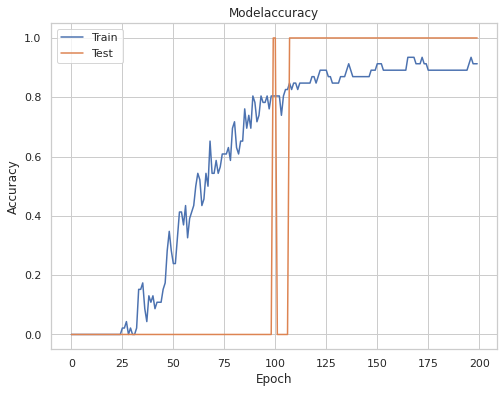

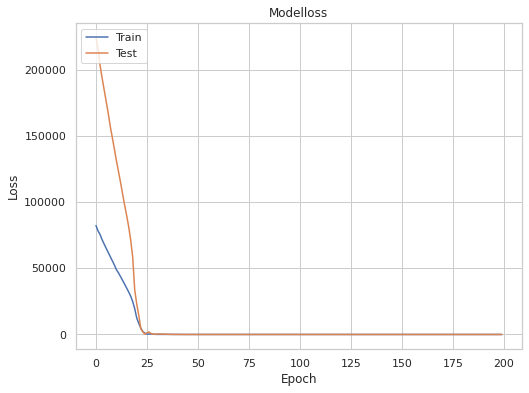

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

input_shape = 3

style = Sequential()
style.add(LSTM(50, activation="relu", input_shape=(3, 1), return_sequences=True))
style.add(LSTM(50, activation="relu"))
style.add(Dense(1, activation='linear'))

style.compile(loss='mean_squared_error',
              optimizer=keras.optimizers.Adamax(learning_rate= 1e-3),
              metrics=['accuracy'])
# Didn't work with epoch 100, only worked with a lot more. (One can see in the graphs that epoch 100 is the critical point. 
# One could conlude we need at least about 125 epochs)
history = style.fit(x_train, y_train,
          epochs=200, 
          verbose=0,
          validation_data=(test_x, test_y))

score = style.evaluate(test_x, test_y, verbose=0)

for idx, metric in enumerate(['accuracy','loss']):
  plt.figure(idx)
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+ metric])
  plt.title('Model'+ metric)
  plt.ylabel(metric.capitalize())
  plt.xlabel('Epoch')
  plt.legend(['Train','Test'], loc='upper left')

print('Test loss:', score[0])
print('Test accuracy:', score[1])

#### BONUS **[ZERO pt]** Change the data generated to something a bit more challenging than `y=10x`, e.g. a sinusoid wave or something else nonlinear and more complex. Run your code again and you should see a difference of performance between single and double LSTM layers. Remember that the network structure is only an upper bound for the function complexity.

# 4. Deep Convolutional Neural Networks

#### 4.1 **[1pt]** Explain the meme on slide 16: what happens when the input $Wx+b$ to the ReLU activation is $\lt 0$?

If the imput $Wx+b<0$ gets passed to the activation function relu in the next layer, the relu function will correct everything to 0, which means that all the data will be lost.

#### 4.2 **[2pt]** Calculate the dimension of the feature space of the third layer of LeNet-5 (16 filters, slide 34). Explain your reasoning.

- Remember it uses Valid Convolution for padding.
- The filter size is really $(5\times5\times6)$ since it takes all channels at a time.
- The number of Filters is the number of neurons.

(10 x 10 x 16). Each of the 16 Filters has dimension (5 x 5 x 6). When applying one filter to a (14 x 14 x 6) matrix we get a 2D matrix with dinensions (10 x 10) because we have no padding. You phrased it: The size of the feature is reduced w.r.t. the input proportionally to the mask size (We loose 2 features of the x axis and 2 features of the y axis with a filtersize of (5 x 5 x 6) and all 6 features of the z axis get reduced to 1). We do this 16 times, so we end up with a (10 x 10 x 16) matrix. Its very hard to explain but would be very easy to show graphically.

#### 4.3 **[4pt]** Write a Python function for 2D convolution that accepts as parameters (besides function and input) the window size, the stride, and a choice between two padding techniques.

- You can start from the code from last week's question on convolution.
- You can stick to square windows if you feel it's easier, though you may find it more natural to generalize to rectangular. Up to you.
- We saw two padding techniques in today's lecture: Valid and Same. Same can be used only if the window size is odd (since you add 2*pad elements per row/column) and is computed without considering the stride. For example, with Same padding when we convolve a 6 x 6 matrix by using a 3 x 3 window with stride = 1 we get a 6 x 6 matrix (pad = 1), whereas, if we use stride = 2 we get a 3 x 3 matrix.
- This function will be necessarily larger and more complex than last week's. Here are some steps you can follow:
    - Assert the validity of the input. Any restriction you choose on (e.g. square input, square window, etc.) should go here.
    - Compute the size of the padding, depending on the technique.
    - Compute the size of the output, and allocate a numpy array to hold it.
    - Pad the input as necessary before you convolve on it.
    - Loop the convolution over rows and columns of the output.
    - For each output row and column, construct the range accessors to the right input window.
    - At the end, test different parameters to ensure you got it right.
- Have a look at the Python integer (or 'floor') [division operator `//`](https://python-reference.readthedocs.io/en/latest/docs/operators/floor_division.html) if you didn't know it yet.
- If you still feel you'd rather follow a guide/tutorial, have look at how they do this in [Tensorflow](https://www.tensorflow.org/api_docs/python/tf/nn/convolution).

In [13]:
def convolve(f, inp, window=(3,3), stride=1, paddingtype='valid'):

  assert all((
      inp.shape[0] == inp.shape[1],
      window[0] == window[1],
      inp.shape[0] >= window[1],
      stride >=1, type(stride) == int,
      paddingtype in ('valid','same'),
      (paddingtype != 'valid' or window[0] % 2 == 1), #assert padding valid or window is odd sized
  )), "wrong input"

  win_size, _ = window
  inp_size, _ = inp.shape

  if paddingtype == 'valid': padding = 0
  elif paddingtype == 'same': padding = (win_size - 1)//2

  output_size = (inp_size + 2 * padding - win_size) // (stride + 1)
  output = np.empty((output_size, output_size), dtype='float32')
  padded_inp = np.pad(inp, padding)

  for row in range(output_size):
    from_r = row * stride
    to_r = row * stride + win_size #compute where to start the padding
    for col in range(output_size):
      from_c = col * stride
      to_c = col * stride +  win_size
      inp_window = padded_inp[from_r:to_r, from_c:to_c]
      output[row, col] = fn(inp_window)
  
  return output

fn = lambda x: x.sum()
inp = np.random.uniform(size=[7,7])

print(convolve(fn, inp, (7,7), 1, 'same'))
print()
print(convolve(fn, inp, (3,3), 1, 'valid'))
print()
print(convolve(fn, inp, (3,3), 2, 'same'))

[[ 7.083957  8.043501 10.400615]
 [ 9.149225 10.774067 13.396089]
 [11.273736 13.167449 16.0049  ]]

[[3.478114  3.3660145]
 [3.3405623 3.6560602]]

[[1.5935321 2.185142 ]
 [1.7831733 3.6560602]]


# 5. Generative Adversarial Networks

#### BONUS **[ZERO pt]** GANs are amazing tools and a great topic, but they are complex enough that implementing a decent example would require a lab by itself. So here is a [great tutorial](https://colab.research.google.com/github/tensorflow/gan/blob/master/tensorflow_gan/examples/colab_notebooks/tfgan_tutorial.ipynb), if you choose to play with it share your progress on Moodle and we'll support you!

# At the end of the exercise

Bonus question with no points! Answering this will have no influence on your scoring, not at the assignment and not towards the exam score -- really feel free to ignore it with no consequence. But solving it will reward you with skills that will make the next lectures easier, give you real applications, and will be good practice towards the exam.

The solution for this questions will not be included in the regular lab solutions pdf, but you are welcome to open a discussion on the Moodle: we will support your addressing it, and you may meet other students that choose to solve this, and find a teammate for the next assignment that is willing to do things for fun and not only for score :)

#### BONUS **[ZERO pt]** word embeddings are one of the most amazing discoveries in Natural Languages Processing of the last years. Follow [this tutorial](https://radimrehurek.com/gensim/auto_examples/tutorials/run_word2vec.html#sphx-glr-auto-examples-tutorials-run-word2vec-py) to learn how to use existing word embeddings (section "Word2Vec Demo") and test if the properties shown during the lecture hold. Then train your own word2vec model as described in section "Training Your Own Model".

#### BONUS **[ZERO pt]** You now know the basis for time series prediction using recurrent networks. Why don't you try your hand at predicting the evolution of the current COVID-19 situation? You can find the main data from JHU CSSE [here](https://github.com/CSSEGISandData/COVID-19), then the data for Switzerland [here](https://github.com/openZH/covid_19) (specifically Fribourg [here](https://github.com/openZH/covid_19/blob/master/fallzahlen_kanton_total_csv_v2/COVID19_Fallzahlen_Kanton_FR_total.csv)), some work from ETHZ [here](https://bsse.ethz.ch/cevo/research/sars-cov-2/real-time-monitoring-in-switzerland.html), and an example for advanced visualization [here](https://opensource.com/article/20/4/python-data-covid-19).

### Final considerations

- You now know how to implement LSTMs with Keras, this is especially important as it allows you to tackle several Natural Language Processing tasks.
- You've got a deeper understanding of convolutions and you should have noticed how things that appear to be small and easy, such as padding and striding, can actually become quite complex. For example, can we apply same padding with an filter of an even shape (e.g. 4 x 4, 6 x 6 etc.)? Can we pad such as even after using a stride > 1 we get a matrix with the same shape as the input? Would it make sense?